In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
import numpy as np

import warnings
warnings.filterwarnings("ignore")

In [2]:
default = pd.read_csv('Loan_default.csv')

In [3]:
default.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255347 entries, 0 to 255346
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   LoanID          255347 non-null  object 
 1   Age             255347 non-null  int64  
 2   Income          255347 non-null  int64  
 3   LoanAmount      255347 non-null  int64  
 4   CreditScore     255347 non-null  int64  
 5   MonthsEmployed  255347 non-null  int64  
 6   NumCreditLines  255347 non-null  int64  
 7   InterestRate    255347 non-null  float64
 8   LoanTerm        255347 non-null  int64  
 9   DTIRatio        255347 non-null  float64
 10  Education       255347 non-null  object 
 11  EmploymentType  255347 non-null  object 
 12  MaritalStatus   255347 non-null  object 
 13  HasMortgage     255347 non-null  object 
 14  HasDependents   255347 non-null  object 
 15  LoanPurpose     255347 non-null  object 
 16  HasCoSigner     255347 non-null  object 
 17  Default   

In [4]:
default.describe()

Age         Income     LoanAmount    CreditScore  \
count  255347.000000  255347.000000  255347.000000  255347.000000   
mean       43.498306   82499.304597  127578.865512     574.264346   
std        14.990258   38963.013729   70840.706142     158.903867   
min        18.000000   15000.000000    5000.000000     300.000000   
25%        31.000000   48825.500000   66156.000000     437.000000   
50%        43.000000   82466.000000  127556.000000     574.000000   
75%        56.000000  116219.000000  188985.000000     712.000000   
max        69.000000  149999.000000  249999.000000     849.000000   

       MonthsEmployed  NumCreditLines   InterestRate       LoanTerm  \
count   255347.000000   255347.000000  255347.000000  255347.000000   
mean        59.541976        2.501036      13.492773      36.025894   
std         34.643376        1.117018       6.636443      16.969330   
min          0.000000        1.000000       2.000000      12.000000   
25%         30.000000        2.000000       7.770000      24.000000   
50%         60.000000        2.000000      13.460000      36.000000   
75%         90.000000        3.000000      19.250000      48.000000   
max        119.000000        4.000000      25.000000      60.000000   

            DTIRatio        Default  
count  255347.000000  255347.000000  
mean        0.500212       0.116128  
std         0.230917       0.320379  
min         0.100000       0.000000  
25%         0.300000       0.000000  
50%         0.500000       0.000000  
75%         0.700000       0.000000  
max         0.900000       1.000000

In [5]:
default.head()

LoanID  Age  Income  LoanAmount  CreditScore  MonthsEmployed  \
0  I38PQUQS96   56   85994       50587          520              80   
1  HPSK72WA7R   69   50432      124440          458              15   
2  C1OZ6DPJ8Y   46   84208      129188          451              26   
3  V2KKSFM3UN   32   31713       44799          743               0   
4  EY08JDHTZP   60   20437        9139          633               8   

   NumCreditLines  InterestRate  LoanTerm  DTIRatio    Education  \
0               4         15.23        36      0.44   Bachelor's   
1               1          4.81        60      0.68     Master's   
2               3         21.17        24      0.31     Master's   
3               3          7.07        24      0.23  High School   
4               4          6.51        48      0.73   Bachelor's   

  EmploymentType MaritalStatus HasMortgage HasDependents LoanPurpose  \
0      Full-time      Divorced         Yes           Yes       Other   
1      Full-time       Married          No            No       Other   
2     Unemployed      Divorced         Yes           Yes        Auto   
3      Full-time       Married          No            No    Business   
4     Unemployed      Divorced          No           Yes        Auto   

  HasCoSigner  Default  
0         Yes        0  
1         Yes        0  
2          No        1  
3          No        0  
4          No        0

In [6]:
#Dropping Loan_ID from df loan
default = default.drop('LoanID', axis=1)

In [7]:
# Calculate the counts for each unique value in the 'LoanPurpose' column
uniqueloanpurpose = default['LoanPurpose'].value_counts()

# Print the counts for each unique value
print("Counts of unique values in the 'LoanPurpose' column:")
print(uniqueloanpurpose)

Counts of unique values in the 'LoanPurpose' column:
Business     51298
Home         51286
Education    51005
Other        50914
Auto         50844
Name: LoanPurpose, dtype: int64


In [8]:
# Create a new DataFrame based on the condition that 'LoanPurpose' must be 'Home'
defaultloan = default[default['LoanPurpose'] == 'Home']

In [9]:
defaultloan.head()

Age  Income  LoanAmount  CreditScore  MonthsEmployed  NumCreditLines  \
6    38  111188      177025          429              80               1   
7    56  126802      155511          531              67               4   
14   57  139699       88143          635             112               4   
16   20  119704       25697          313              49               1   
26   29  114651      197648          343              58               3   

    InterestRate  LoanTerm  DTIRatio   Education EmploymentType MaritalStatus  \
6          19.11        12      0.16  Bachelor's     Unemployed        Single   
7           8.15        60      0.43         PhD      Full-time       Married   
14          5.63        48      0.20    Master's      Part-time      Divorced   
16          9.63        24      0.28         PhD     Unemployed        Single   
26         21.07        24      0.19  Bachelor's      Part-time       Married   

   HasMortgage HasDependents LoanPurpose HasCoSigner  Default  
6          Yes            No        Home         Yes        0  
7           No            No        Home         Yes        0  
14          No            No        Home          No        0  
16         Yes            No        Home          No        0  
26         Yes            No        Home         Yes        0

In [10]:
defaultloan.dtypes

Age                 int64
Income              int64
LoanAmount          int64
CreditScore         int64
MonthsEmployed      int64
NumCreditLines      int64
InterestRate      float64
LoanTerm            int64
DTIRatio          float64
Education          object
EmploymentType     object
MaritalStatus      object
HasMortgage        object
HasDependents      object
LoanPurpose        object
HasCoSigner        object
Default             int64
dtype: object

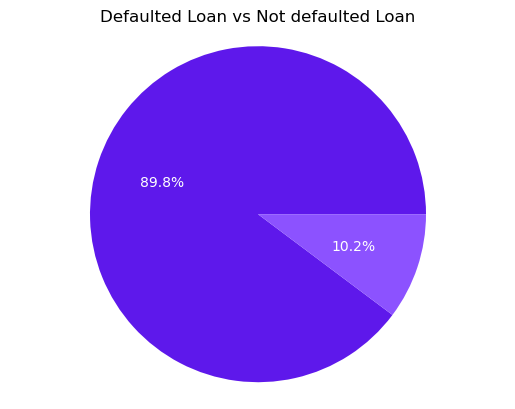

In [11]:
#Matplotlib is used here

labels = ['0', '1']
sizes = defaultloan.Default.value_counts(normalize=True)
colors = ['#5E18EB', '#8C52FF']

# plot
plt.pie(sizes, labels=labels, colors=colors,
        autopct=lambda p: '{:.1f}%'.format(p) if p > 0 else '',
        textprops={'color':"white"})
plt.axis('equal')
plt.title('Defaulted Loan vs Not defaulted Loan')
plt.show()

In [12]:
numerical=defaultloan.select_dtypes([np.number]).columns
print(numerical)
categorycol=defaultloan.select_dtypes('object').columns
print(categorycol)

Index(['Age', 'Income', 'LoanAmount', 'CreditScore', 'MonthsEmployed',
       'NumCreditLines', 'InterestRate', 'LoanTerm', 'DTIRatio', 'Default'],
      dtype='object')
Index(['Education', 'EmploymentType', 'MaritalStatus', 'HasMortgage',
       'HasDependents', 'LoanPurpose', 'HasCoSigner'],
      dtype='object')


In [13]:
le = LabelEncoder()
categoricalfeatures = ['Education', 'EmploymentType', 'MaritalStatus', 'HasMortgage',
       'HasDependents', 'LoanPurpose', 'HasCoSigner']
for col in defaultloan[categoricalfeatures]:
    defaultloan[col]=le.fit_transform(defaultloan[col])

In [14]:
#Create a StandardScaler object
scaler = StandardScaler()
# Select the columns to be normalized
normalizedcols = ['Age', 'Income', 'LoanAmount', 'CreditScore', 'MonthsEmployed',
       'NumCreditLines', 'InterestRate', 'LoanTerm', 'DTIRatio']
# Fit the scaler to the selected columns and transform the data
defaultloan[normalizedcols] = scaler.fit_transform(defaultloan[normalizedcols])

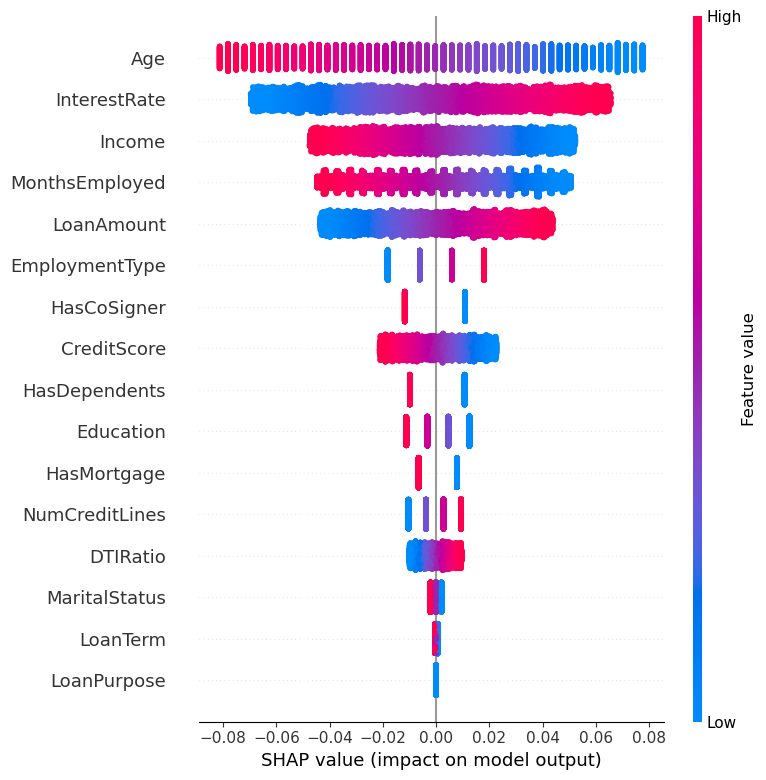

In [15]:
import shap

# Split the data into features and target
X = defaultloan.drop(columns=['Default'])  # Replace 'target_column' with the actual target column name
y = defaultloan['Default']  # Replace 'target_column' with the actual target column name

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Create the SHAP explainer object
explainer = shap.Explainer(model, X_train)

# Compute SHAP values
shap_values = explainer(X_test)

# Visualize the SHAP values
shap.summary_plot(shap_values, X_test)

In [16]:
shap.initjs() 

In [17]:
import dalex as dx
data = dx.datasets.load_titanic()

X = defaultloan.drop(columns='Default')
y = defaultloan.Default

In [18]:
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV

# Selecting numerical and categorical columns
numericalCols = X.select_dtypes(exclude=['object']).columns.tolist()
categoricalCols = X.select_dtypes(include=['object']).columns.tolist()

# Pipelines for numerical and categorical data
num_pipe = make_pipeline(SimpleImputer(strategy='mean'), 
                         StandardScaler())

cat_pipe = make_pipeline(SimpleImputer(strategy='constant', fill_value='N/A'),
                        OneHotEncoder(handle_unknown='ignore', sparse=False))

# Reduced parameter grid
parameters = {'randomforestclassifier__n_estimators': [100, 200],
              'randomforestclassifier__max_depth': [3, 6],
              'randomforestclassifier__criterion': ['gini'],
              'randomforestclassifier__max_features': ['sqrt'],
              'randomforestclassifier__bootstrap': [True]}

# Reduced cross-validation folds and a smaller n_iter for RandomizedSearchCV
pipe = RandomizedSearchCV(make_pipeline(ColumnTransformer([('categorical', cat_pipe, categoricalCols),
                                                          ('numerical', num_pipe, numericalCols)]),
                                        RandomForestClassifier()),
                          parameters, n_iter=5, cv=3).fit(X, y)

print('Cross Validation Score: {:.2f}%'.format(pipe.best_score_ * 100))


Cross Validation Score: 89.78%


In [19]:
pipe.best_estimator_.named_steps['randomforestclassifier'].feature_importances_

array([0.26729218, 0.2259855 , 0.11699182, 0.02854624, 0.0988903 ,
       0.00553187, 0.1943263 , 0.00358888, 0.0144392 , 0.00931703,
       0.0138602 , 0.0028878 , 0.00386205, 0.00754817, 0.        ,
       0.00693247])

In [20]:
import shap

In [21]:
shap.initjs() 

In [22]:
Xexp=ColumnTransformer([('categorical', cat_pipe, categoricalCols),
                                    ('numerical', num_pipe, numericalCols)]).fit_transform(X)

In [23]:
explainer = shap.Explainer(pipe.best_estimator_.named_steps['randomforestclassifier'], algorithm='tree') 
shap_values = explainer(Xexp) 

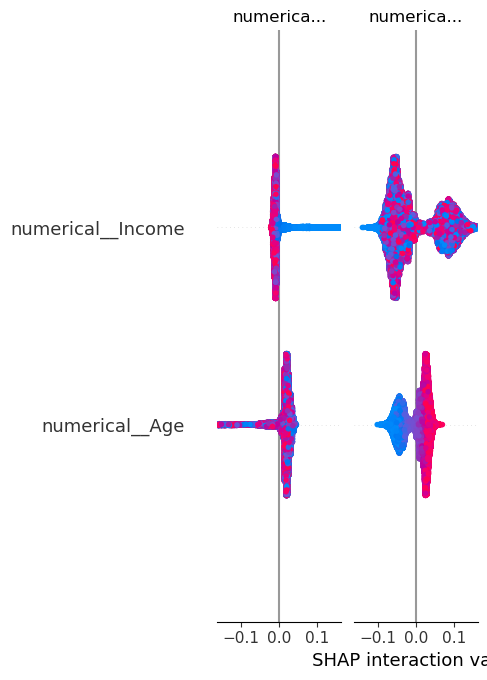

In [24]:
shap.summary_plot(shap_values, Xexp, plot_type='bar',
    feature_names=pipe.best_estimator_.named_steps.columntransformer.get_feature_names_out());

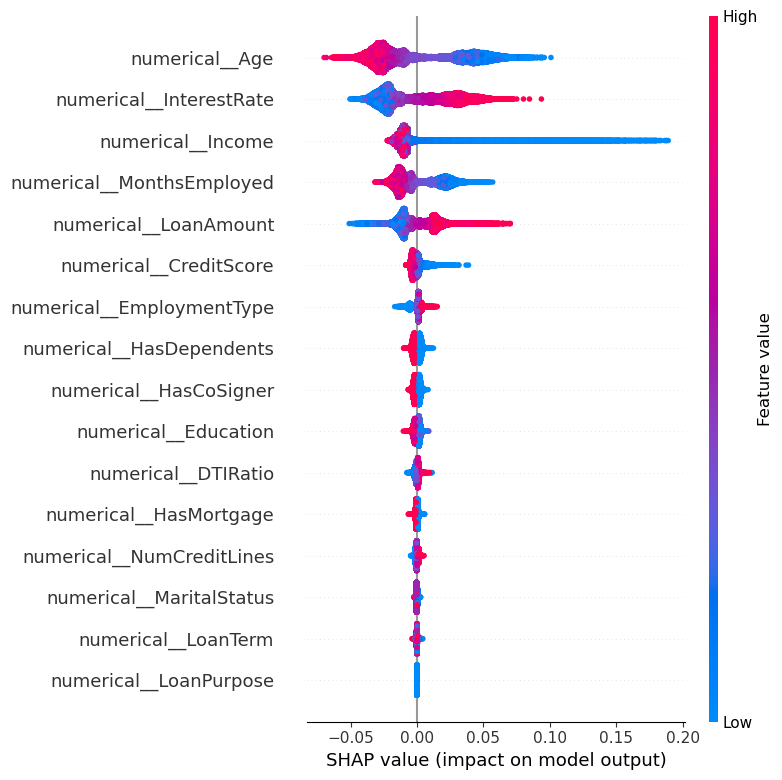

In [25]:
explainer = shap.TreeExplainer(pipe.best_estimator_.named_steps['randomforestclassifier'])
shap_values = explainer.shap_values(Xexp, approximate=False, check_additivity=False)

shap.summary_plot(shap_values[1], Xexp, 
            feature_names=pipe.best_estimator_.named_steps.columntransformer.get_feature_names_out())

In [27]:
pip install --upgrade scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [28]:
import matplotlib.pyplot as plt
def make_shap_waterfall_plot(shap_values, features, num_display=20):
    '''
    A function for building a SHAP waterfall plot.
    
    SHAP waterfall plot is used to visualize the most important features in a descending order.
    
    Parameters:
    shap_values (list): SHAP values obtained from a model
    features (pandas DataFrame): a list of features used in a model
    num_display(int): number of features to display
    
    Returns:
    matplotlib.pyplot plot: SHAP waterfall plot
    '''
    column_list = pipe.best_estimator_.named_steps.columntransformer.get_feature_names_out()
    feature_ratio = (np.abs(shap_values).sum(0) / np.abs(shap_values).sum()) * 100
    column_list = column_list[np.argsort(feature_ratio)[::-1]]
    feature_ratio_order = np.sort(feature_ratio)[::-1]
    cum_sum = np.cumsum(feature_ratio_order)
    column_list = column_list[:num_display]
    feature_ratio_order = feature_ratio_order[:num_display]
    cum_sum = cum_sum[:num_display]
    
    num_height = 0
    if (num_display >= 20) & (len(column_list) >= 20):
        num_height = (len(column_list) - 20) * 0.4
        
    fig, ax1 = plt.subplots(figsize=(8, 8 + num_height))
    ax1.plot(cum_sum[::-1], column_list[::-1], c='blue', marker='o')
    ax2 = ax1.twiny()
    ax2.barh(column_list[::-1], feature_ratio_order[::-1], alpha=0.6)
    
    ax1.grid(True)
    ax2.grid(False)
    ax1.set_xticks(np.arange(0, round(cum_sum.max(), -1)+1, 10))
    ax2.set_xticks(np.arange(0, round(feature_ratio_order.max(), -1)+1, 10))
    ax1.set_xlabel('Cumulative Ratio')
    ax2.set_xlabel('Composition Ratio')
    ax1.tick_params(axis="y", labelsize=13)
    plt.ylim(-1, len(column_list))

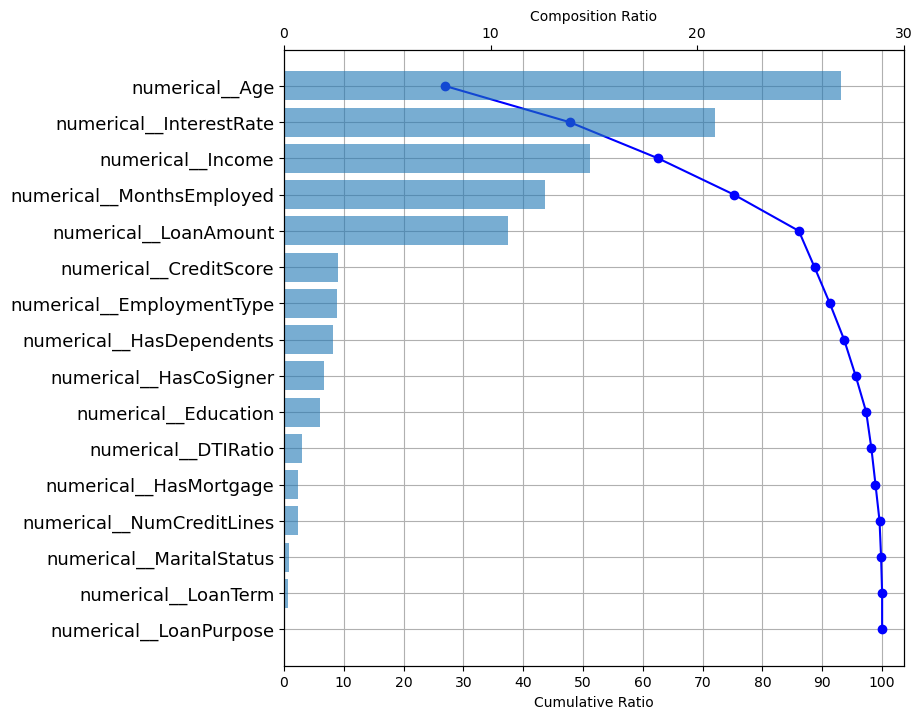

In [29]:
# Shapp waterfall plot
make_shap_waterfall_plot(shap_values[1], Xexp)

In [30]:
Xdata = pd.DataFrame(Xexp)
Xdata.columns = pipe.best_estimator_.named_steps.columntransformer.get_feature_names_out()
Xdata

numerical__Age  numerical__Income  numerical__LoanAmount  \
0           -0.366788           0.739367               0.696880   
1            0.837079           1.140414               0.393401   
2            0.903961           1.471675              -0.556902   
3           -1.570655           0.958101              -1.437774   
4           -0.968722           0.828314               0.987791   
...               ...                ...                    ...   
51281        0.435790          -1.554262               1.397377   
51282        1.639657          -1.558860               0.572831   
51283        0.502672          -0.331600              -0.065740   
51284       -0.233025           1.219729              -0.162268   
51285       -0.768077          -0.782091               0.878483   

       numerical__CreditScore  numerical__MonthsEmployed  \
0                   -0.921865                   0.601516   
1                   -0.278091                   0.224421   
2                    0.378305                   1.529750   
3                   -1.654000                  -0.297710   
4                   -1.464655                  -0.036645   
...                       ...                        ...   
51281                1.665853                   0.079385   
51282               -1.407851                   0.543502   
51283               -1.433097                   0.195414   
51284                0.794865                  -0.616791   
51285               -0.404322                  -1.312966   

       numerical__NumCreditLines  numerical__InterestRate  \
0                      -1.345695                 0.839531   
1                       1.342375                -0.808534   
2                       1.342375                -1.187469   
3                      -1.345695                -0.585985   
4                       0.446352                 1.134258   
...                          ...                      ...   
51281                  -1.345695                -1.161906   
51282                  -0.449671                -0.573955   
51283                  -0.449671                -0.405540   
51284                   0.446352                -0.543881   
51285                  -0.449671                -0.297273   

       numerical__LoanTerm  numerical__DTIRatio  numerical__Education  \
0                -1.413973            -1.468099             -1.336710   
1                 1.412183            -0.300340              1.345216   
2                 0.705644            -1.295098              0.451241   
3                -0.707434            -0.949095              1.345216   
4                -0.707434            -1.338348             -1.336710   
...                    ...                  ...                   ...   
51281             0.705644             0.651168             -0.442734   
51282             1.412183            -0.603092              1.345216   
51283             0.705644            -0.992345             -0.442734   
51284            -0.707434            -1.165347             -0.442734   
51285            -0.707434            -1.251847             -0.442734   

       numerical__EmploymentType  numerical__MaritalStatus  \
0                       1.340791                  1.224461   
1                      -1.344212                  0.001240   
2                      -0.449211                 -1.221980   
3                       1.340791                  1.224461   
4                      -0.449211                  0.001240   
...                          ...                       ...   
51281                   0.445790                 -1.221980   
51282                  -1.344212                 -1.221980   
51283                  -0.449211                 -1.221980   
51284                  -0.449211                 -1.221980   
51285                  -0.449211                 -1.221980   

       numerical__HasMortgage  numerical__HasDependents  \
0                    1.003516                 -1.000039   
1       

In [31]:
feature_list = pipe.best_estimator_.named_steps.columntransformer.get_feature_names_out()
top_features = ['numerical__Age', 'numerical__InterestRate', 'numerical__Income']

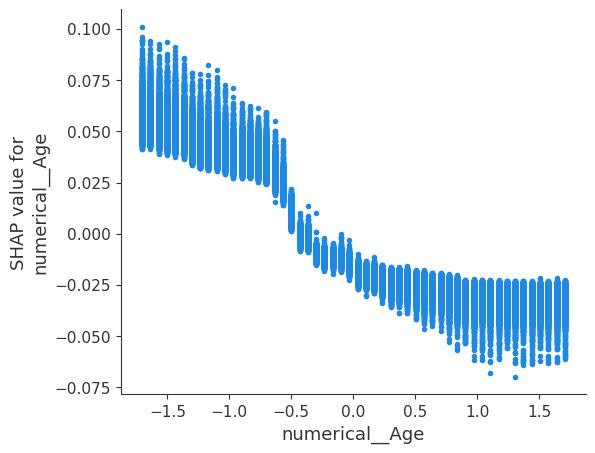

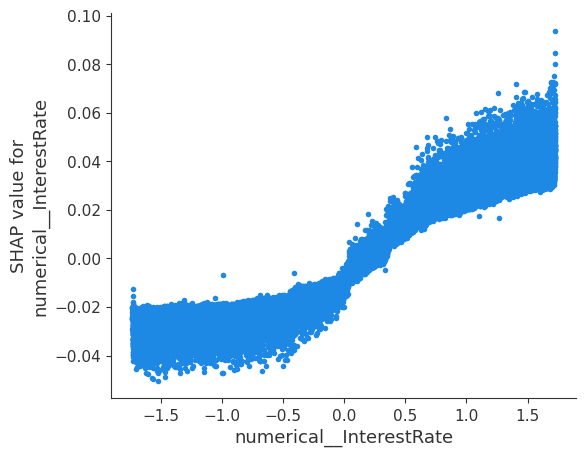

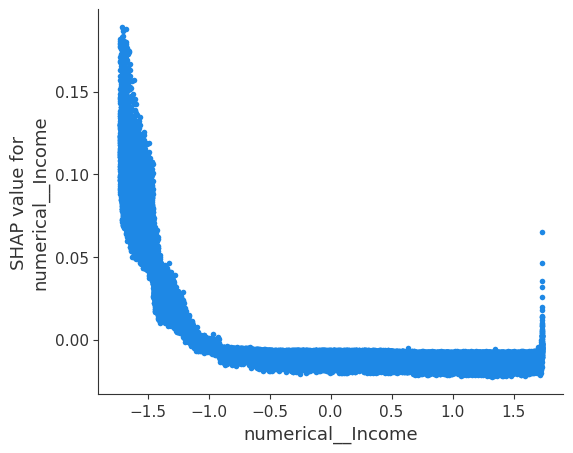

In [32]:
for feature in top_features:
    shap.dependence_plot(feature, shap_values[1], Xdata, interaction_index=None)

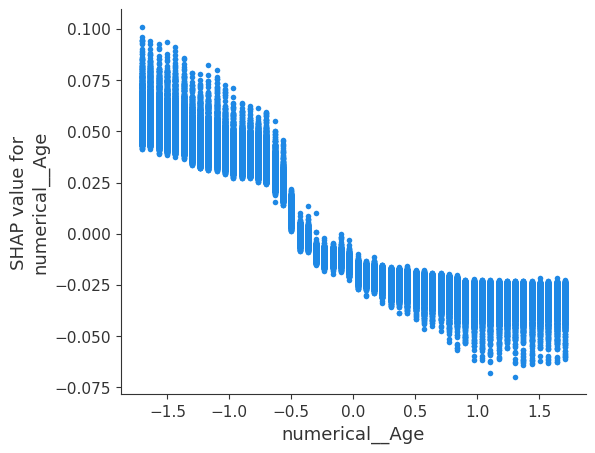

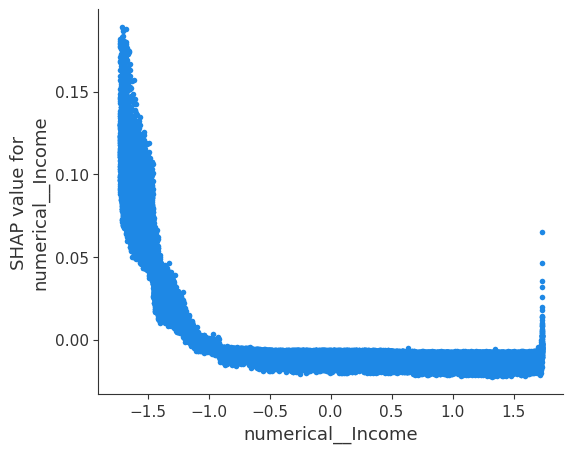

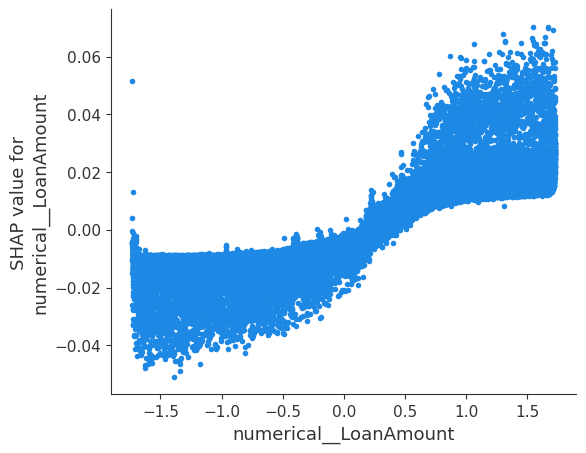

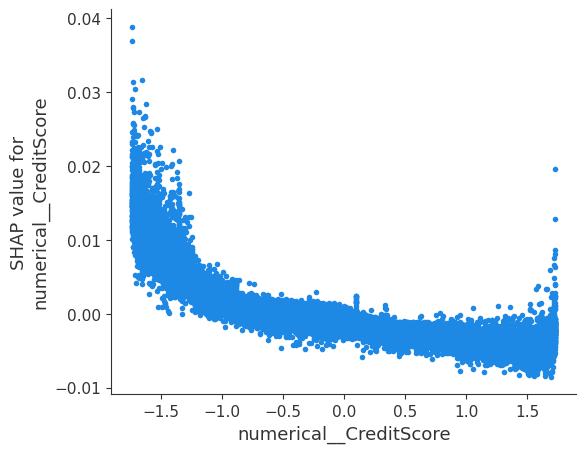

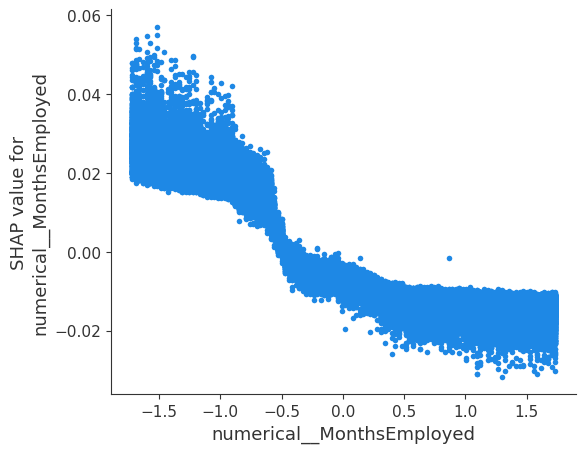

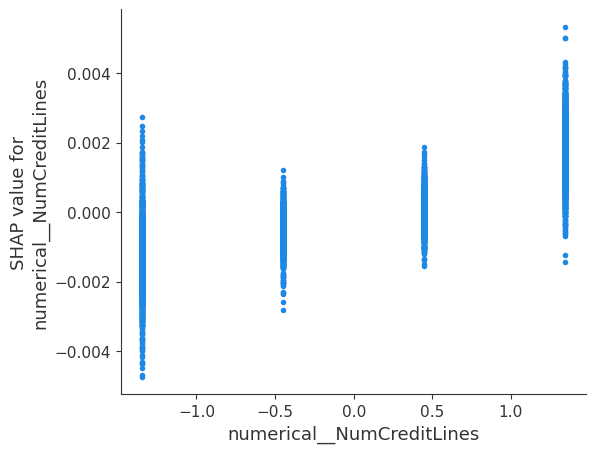

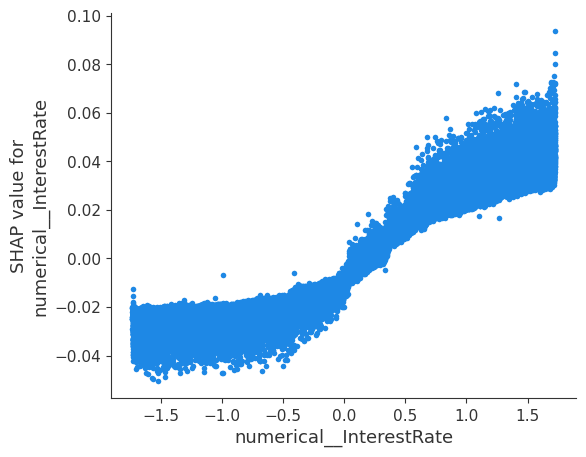

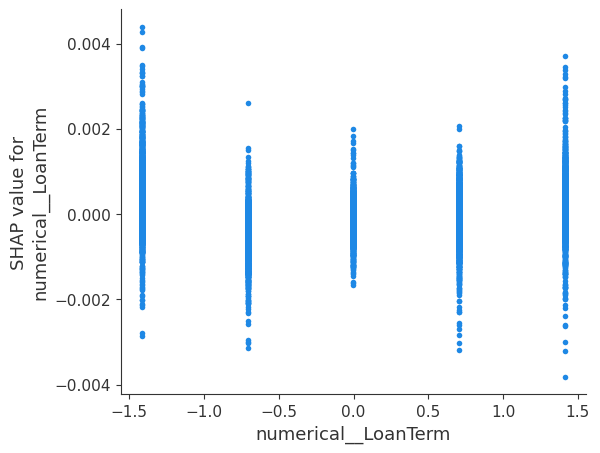

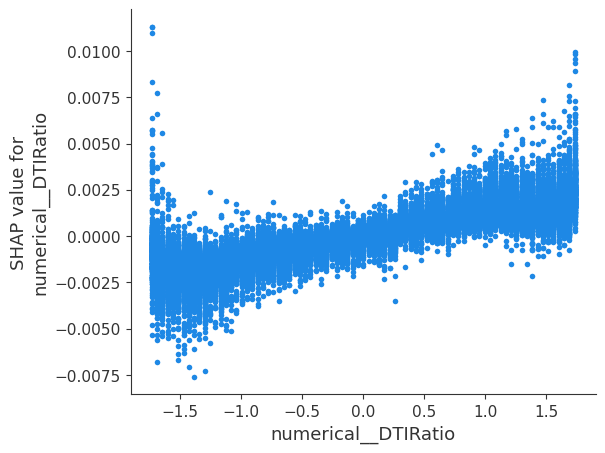

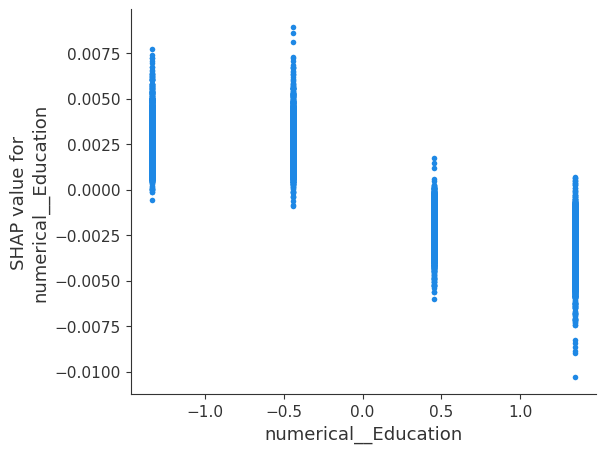

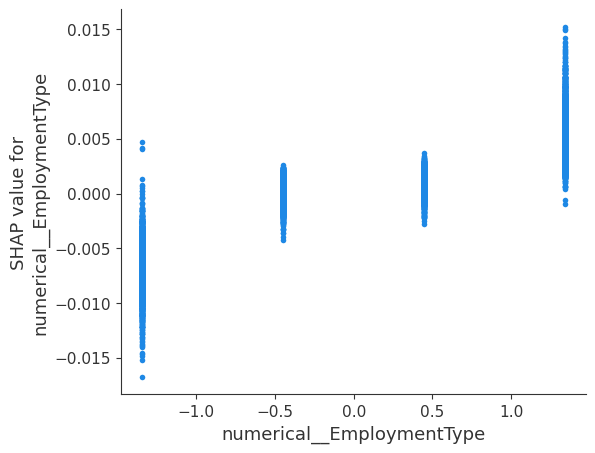

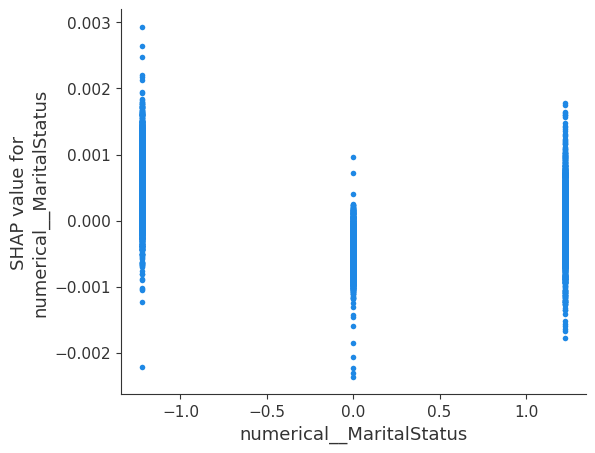

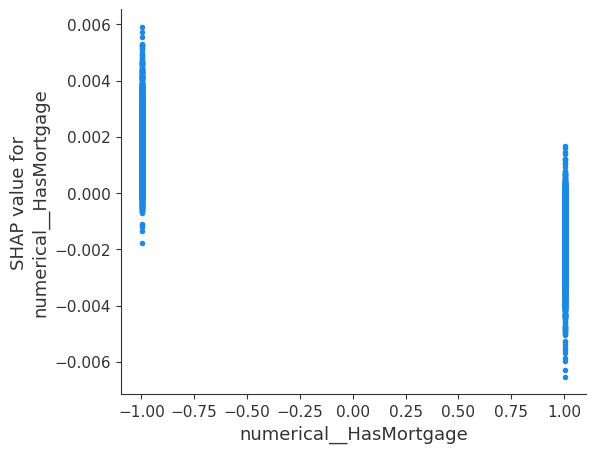

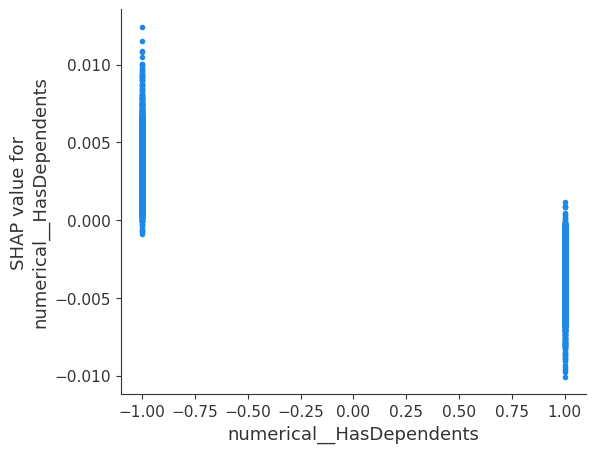

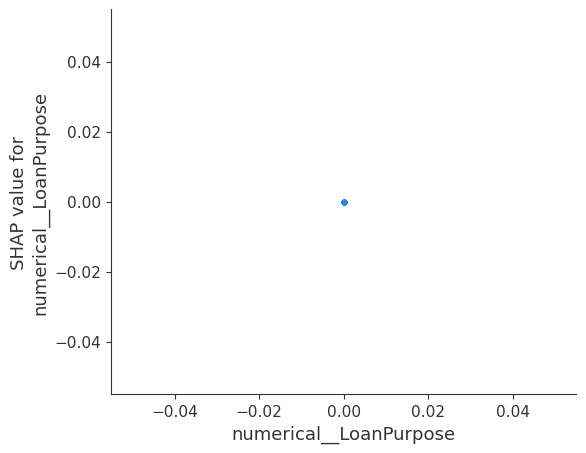

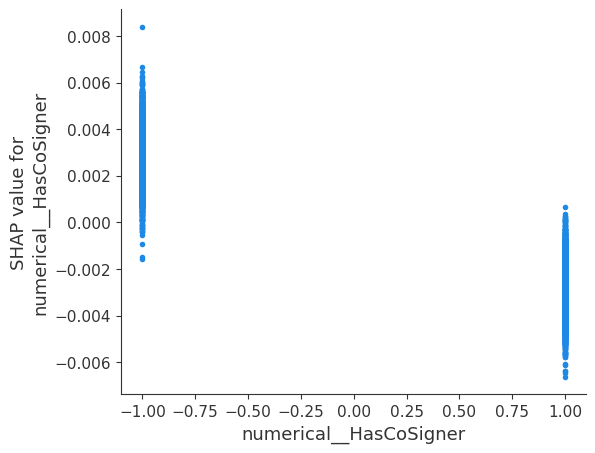

In [33]:
for feature in feature_list:
    shap.dependence_plot(feature, shap_values[1], Xdata, interaction_index=None)

In [34]:
explainer = shap.TreeExplainer(pipe.best_estimator_.named_steps['randomforestclassifier'])
shap_values = explainer.shap_values(Xdata)
expected_value = explainer.expected_value

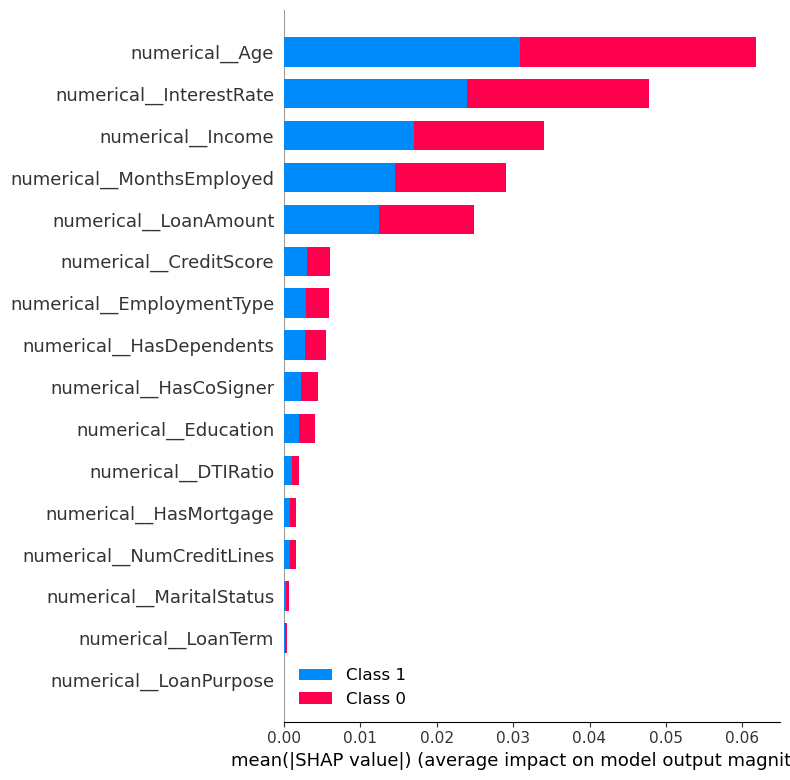

In [35]:
# Generate summary dot plot
shap.summary_plot(shap_values, Xdata,title="SHAP summary plot") 

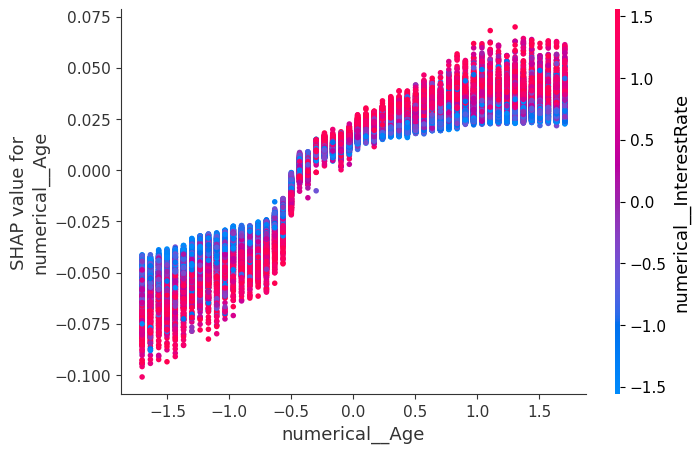

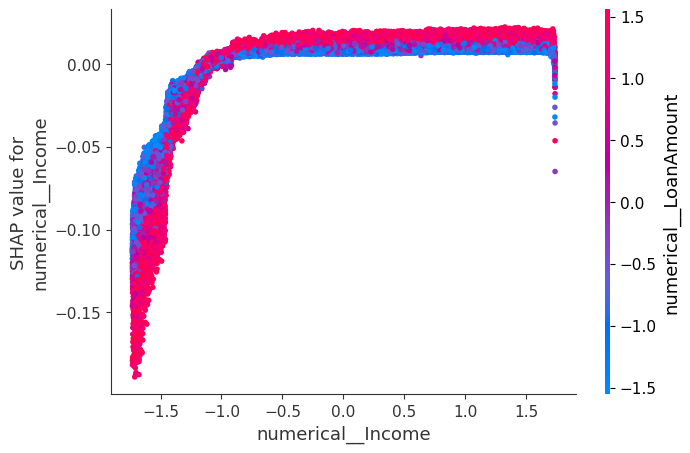

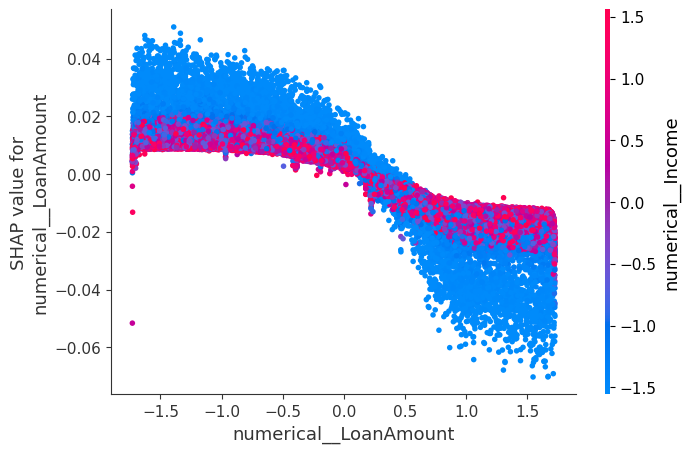

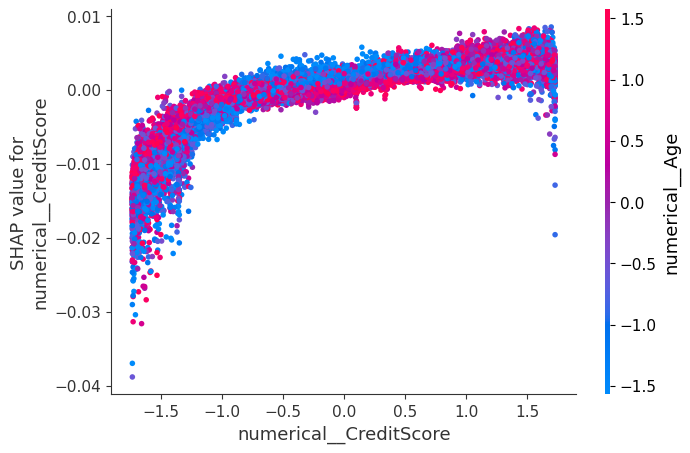

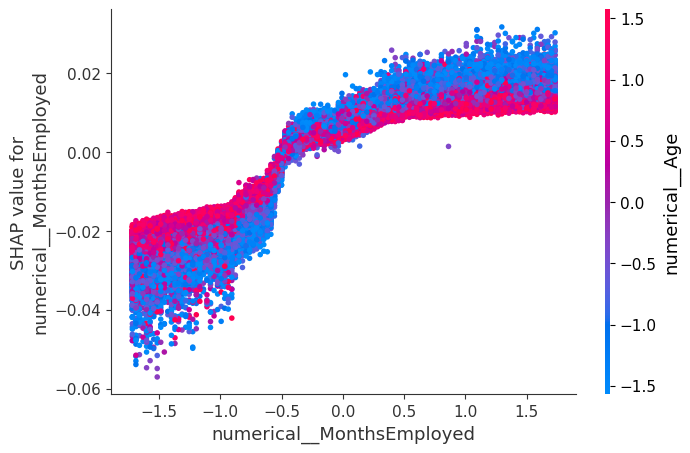

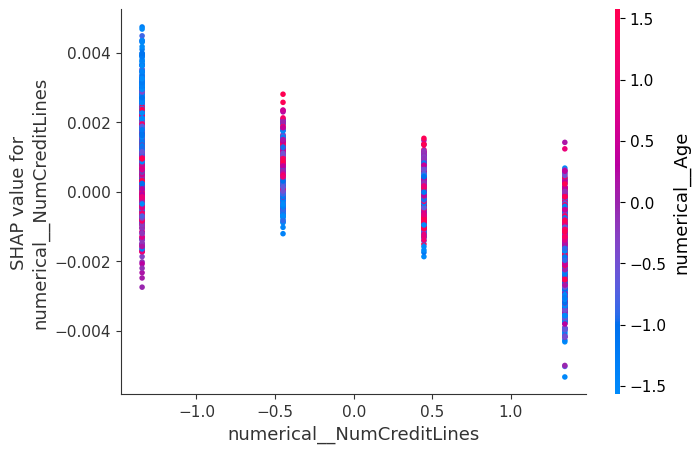

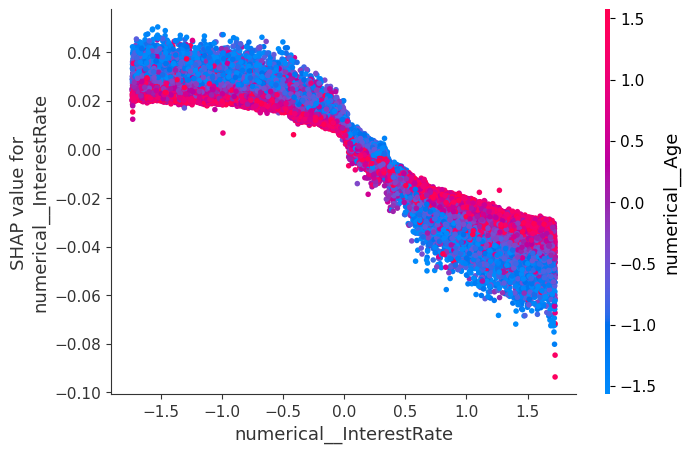

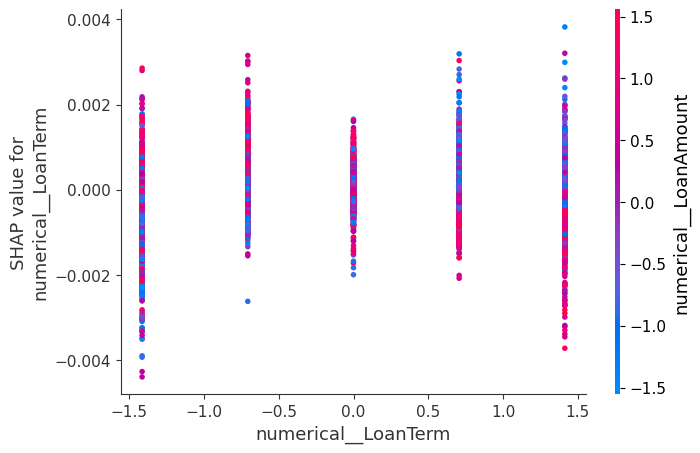

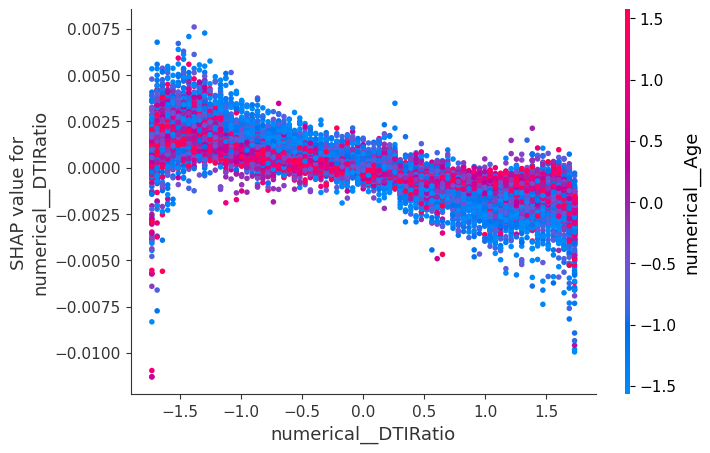

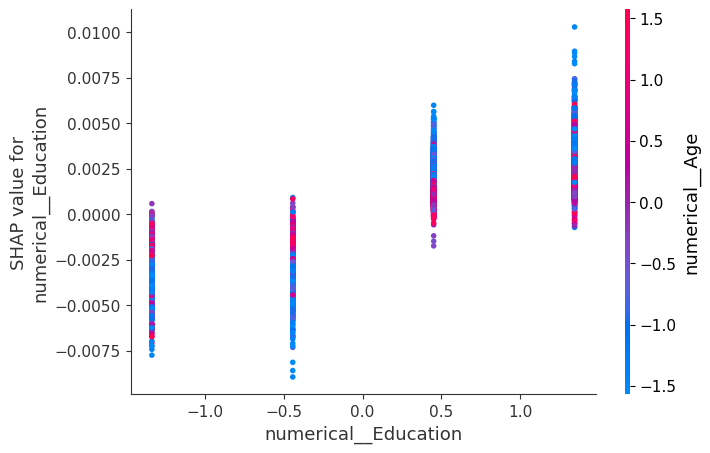

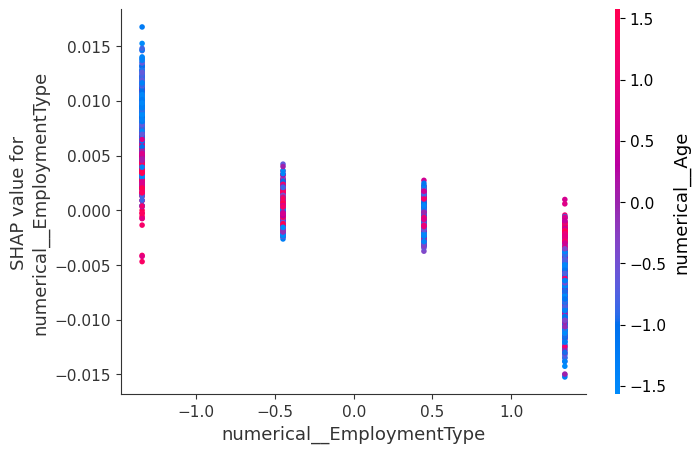

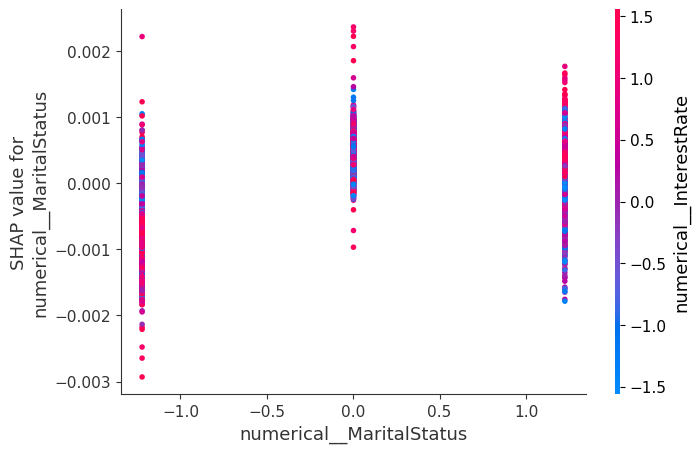

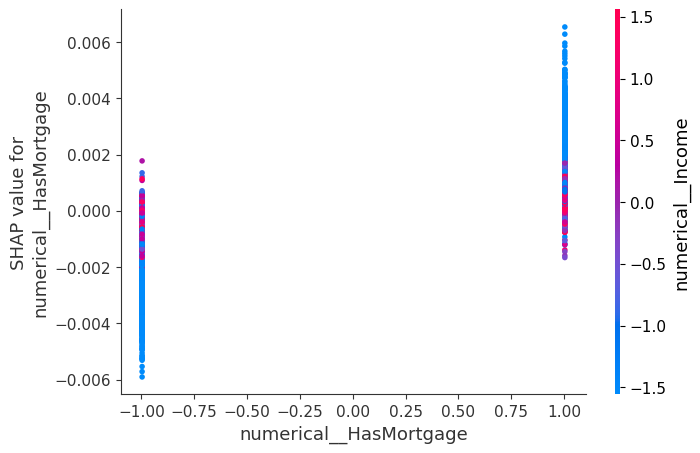

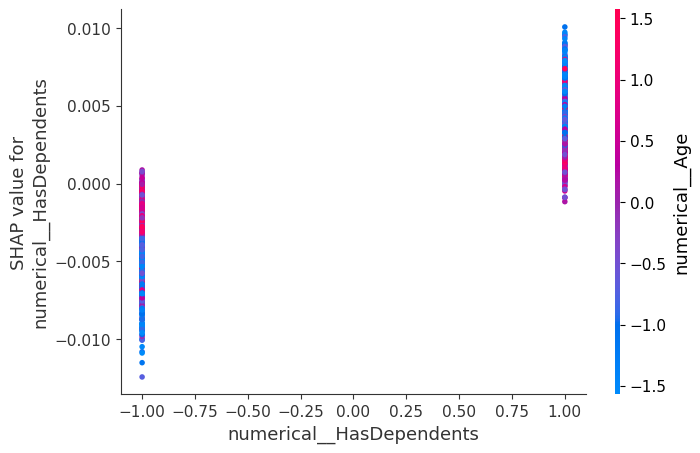

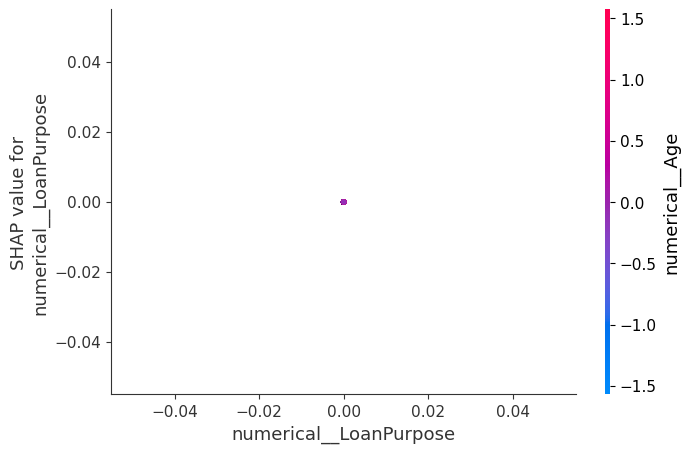

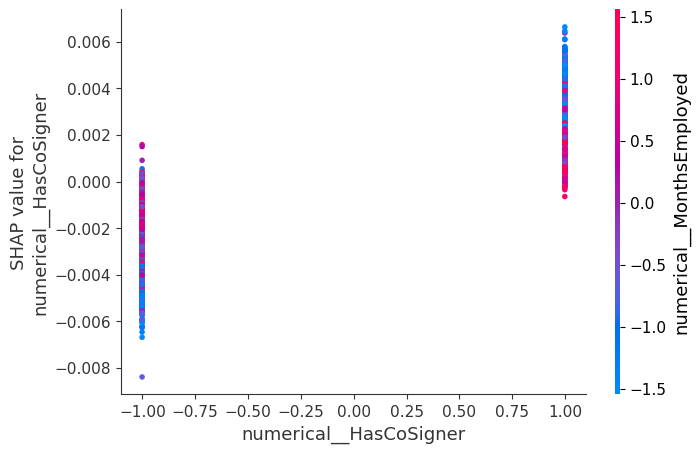

In [36]:
# Generate multiple dependence plots
for name in Xdata.columns:
     shap.dependence_plot(name, shap_values[0], Xdata)

In [37]:
exp = dx.Explainer(pipe.best_estimator_, X, y)

Preparation of a new explainer is initiated

  -> data              : 51286 rows 16 cols
  -> target variable   : Parameter 'y' was a pandas.Series. Converted to a numpy.ndarray.
  -> target variable   : 51286 values
  -> model_class       : sklearn.ensemble._forest.RandomForestClassifier (default)
  -> label             : Not specified, model's class short name will be used. (default)
  -> predict function  : <function yhat_proba_default at 0x28974eb90> will be used (default)
  -> predict function  : Accepts only pandas.DataFrame, numpy.ndarray causes problems.
  -> predicted values  : min = 0.0222, mean = 0.102, max = 0.537
  -> model type        : classification will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -0.486, mean = 8.12e-05, max = 0.971
  -> model_info        : package sklearn

A new explainer has been created!


In [38]:
exp.model_parts().plot()

In [39]:
exp.model_profile().plot()

Calculating ceteris paribus: 100%|██████████████| 16/16 [00:01<00:00, 15.30it/s]


In [40]:
exp.model_performance(model_type='classification').plot(geom='roc')

In [41]:
best_pipeline = pipe.best_estimator_

In [42]:
column_transformer = best_pipeline.named_steps['columntransformer']

In [43]:
transformed_column_names = column_transformer.get_feature_names_out()
print(transformed_column_names)

['numerical__Age' 'numerical__Income' 'numerical__LoanAmount'
 'numerical__CreditScore' 'numerical__MonthsEmployed'
 'numerical__NumCreditLines' 'numerical__InterestRate'
 'numerical__LoanTerm' 'numerical__DTIRatio' 'numerical__Education'
 'numerical__EmploymentType' 'numerical__MaritalStatus'
 'numerical__HasMortgage' 'numerical__HasDependents'
 'numerical__LoanPurpose' 'numerical__HasCoSigner']


In [44]:
education_encoding = {"Master's": 1, 'Other': 0}  
employment_type_encoding = {'Unemployed': 1, 'Employed': 0}  
marital_status_encoding = {'Divorced': 1, 'Married': 0}  
binary_encoding = {'Yes': 1, 'No': 0}

instance2 = pd.DataFrame({
    'Age': [46],
    'Income': [84208],
    'LoanAmount': [129188],
    'CreditScore': [451],
    'MonthsEmployed': [26],
    'NumCreditLines': [3],
    'InterestRate': [21.17],
    'LoanTerm': [24],
    'DTIRatio': [0.31],
    'Education': [education_encoding["Master's"]],  
    'EmploymentType': [employment_type_encoding['Unemployed']], 
    'MaritalStatus': [marital_status_encoding['Divorced']], 
    'HasMortgage': [binary_encoding['Yes']], 
    'HasDependents': [binary_encoding['Yes']], 
    'LoanPurpose': [0],  
    'HasCoSigner': [binary_encoding['No']]  
})

prediction = exp.predict(instance2)
print(prediction)

[0.11512524]


In [45]:
exp.predict(X)[0:10]

array([0.10302704, 0.03846548, 0.03189466, 0.10969552, 0.1916967 ,
       0.09533278, 0.10239787, 0.13236644, 0.08219009, 0.07070645])

In [46]:
exp.predict(instance2)

array([0.11512524])

In [47]:
bd_instance2 = exp.predict_parts(instance2, type='break_down', label=instance2.index[0])
bd_interactions_instance2 = exp.predict_parts(instance2, type='break_down_interactions', label="instance2+")

In [48]:
bd_instance2.result

variable_name variable_value               variable  cumulative  \
0        intercept                             intercept    0.102266   
1     InterestRate          21.17   InterestRate = 21.17    0.168507   
2       LoanAmount       129200.0  LoanAmount = 129200.0    0.190334   
3           Income        84210.0       Income = 84210.0    0.186573   
4      HasCoSigner            0.0      HasCoSigner = 0.0    0.187729   
5        Education            1.0        Education = 1.0    0.191542   
6   NumCreditLines            3.0   NumCreditLines = 3.0    0.192002   
7   EmploymentType            1.0   EmploymentType = 1.0    0.186703   
8         DTIRatio           0.31        DTIRatio = 0.31    0.188304   
9         LoanTerm           24.0        LoanTerm = 24.0    0.187094   
10     LoanPurpose            0.0      LoanPurpose = 0.0    0.187094   
11   MaritalStatus            1.0    MaritalStatus = 1.0    0.187031   
12     HasMortgage            1.0      HasMortgage = 1.0    0.192033   
13     CreditScore          451.0    CreditScore = 451.0    0.185658   
14   HasDependents            1.0    HasDependents = 1.0    0.180162   
15  MonthsEmployed           26.0  MonthsEmployed = 26.0    0.153204   
16             Age           46.0             Age = 46.0    0.115125   
17                                            prediction    0.115125   

    contribution  sign  position                   label  
0       0.102266   1.0        17  RandomForestClassifier  
1       0.066240   1.0        16  RandomForestClassifier  
2       0.021827   1.0        15  RandomForestClassifier  
3      -0.003761  -1.0        14  RandomForestClassifier  
4       0.001156   1.0        13  RandomForestClassifier  
5       0.003812   1.0        12  RandomForestClassifier  
6       0.000460   1.0        11  RandomForestClassifier  
7      -0.005299  -1.0        10  RandomForestClassifier  
8       0.001601   1.0         9  RandomForestClassifier  
9      -0.001210  -1.0         8  RandomForestClassifier  
10      0.000000   0.0         7  RandomForestClassifier  
11     -0.000063  -1.0         6  RandomForestClassifier  
12      0.005002   1.0         5  RandomForestClassifier  
13     -0.006375  -1.0         4  RandomForestClassifier  
14     -0.005496  -1.0         3  RandomForestClassifier  
15     -0.026958  -1.0         2  RandomForestClassifier  
16     -0.038079  -1.0         1  RandomForestClassifier  
17      0.115125   1.0         0  RandomForestClassifier

In [49]:
bd_instance2.plot(bd_interactions_instance2)

In [50]:
exp.predict_parts(instance2, type='shap', B = 10, label=instance2.index[0]).plot(max_vars=5)

In [51]:
cp_instance2 = exp.predict_profile(instance2, label=instance2.index[0])

cp_instance2.result.head()

Calculating ceteris paribus: 100%|█████████████| 16/16 [00:00<00:00, 160.96it/s]


Age   Income  LoanAmount  CreditScore  MonthsEmployed  NumCreditLines  \
0 -1.704418  84208.0    129188.0        451.0            26.0             3.0   
0 -1.670309  84208.0    129188.0        451.0            26.0             3.0   
0 -1.636199  84208.0    129188.0        451.0            26.0             3.0   
0 -1.602089  84208.0    129188.0        451.0            26.0             3.0   
0 -1.567980  84208.0    129188.0        451.0            26.0             3.0   

   InterestRate  LoanTerm  DTIRatio  Education  ...  MaritalStatus  \
0         21.17      24.0      0.31        1.0  ...            1.0   
0         21.17      24.0      0.31        1.0  ...            1.0   
0         21.17      24.0      0.31        1.0  ...            1.0   
0         21.17      24.0      0.31        1.0  ...            1.0   
0         21.17      24.0      0.31        1.0  ...            1.0   

   HasMortgage  HasDependents  LoanPurpose  HasCoSigner  _original_    _yhat_  \
0          1.0            1.0            0          0.0        46.0  0.218878   
0          1.0            1.0            0          0.0        46.0  0.218878   
0          1.0            1.0            0          0.0        46.0  0.218878   
0          1.0            1.0            0          0.0        46.0  0.217266   
0          1.0            1.0            0          0.0        46.0  0.217266   

   _vname_ _ids_                 _label_  
0      Age     0  RandomForestClassifier  
0      Age     0  RandomForestClassifier  
0      Age     0  RandomForestClassifier  
0      Age     0  RandomForestClassifier  
0      Age     0  RandomForestClassifier  

[5 rows x 21 columns]

In [52]:
import explainerdashboard as expdb
from explainerdashboard import ClassifierExplainer, ExplainerDashboard
from explainerdashboard import InlineExplainer
from explainerdashboard.custom import (ImportancesComposite,
                                       IndividualPredictionsComposite,
                                       WhatIfComposite,
                                       ShapDependenceComposite,
                                       ShapInteractionsComposite,
                                       DecisionTreesComposite)

In [53]:
# Create the explainer object
explainer = ClassifierExplainer(pipe.best_estimator_, X, y, model_output='logodds')

splitting pipeline...
Detected sklearn/imblearn Pipeline and succesfully extracted final output dataframe with column names and final model...
Detected RandomForestClassifier model: Changing class type to RandomForestClassifierExplainer...
Generating self.shap_explainer = shap.TreeExplainer(model)


In [54]:
# Create individual component plants using Inexplainer
ie = InlineExplainer(explainer)

In [55]:
# SHAP overview
ie.shap.overview()

Calculating shap values...
